## Import required modules

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

print('OpenCV Version: ', cv2.__version__)
print('NumPy Version: ', np.__version__)

OpenCV Version:  4.1.1
NumPy Version:  1.16.4


## Function to view an image

In [2]:
def viewImage(label, image, cmap = None):
    
    # Set plot size
    plt.subplots(figsize=(5, 5))
    
    # Set plot to show image
    plt.imshow(image, cmap=cmap)
    
    # Set title using label provided
    plt.title(label)
    
    # Show plot
    plt.show()

## Read and view leaf image

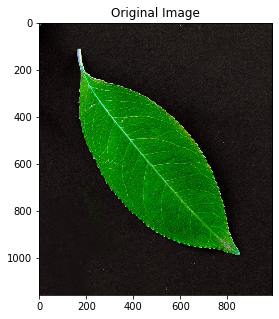

In [3]:
image = cv2.imread('./leaf.jpeg')
viewImage('Original Image', image)

## Green HSV color representation

In [4]:
green = np.uint8([[[0, 255, 0 ]]])
green_hsv = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)
print('Green HSV Color: ', green_hsv)

Green HSV Color:  [[[ 60 255 255]]]


## Converting the image to HSV

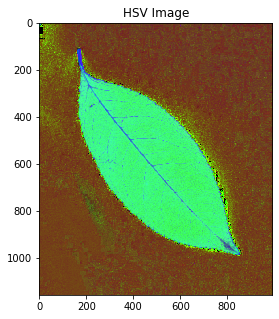

In [5]:
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
viewImage('HSV Image', hsv_img)

All the greens in the world lie within [45, 100, 50] to [75, 255, 255]

so, range that we'll be using will be:
    - 60–15, 100, 50
    - 60+15, 255, 255

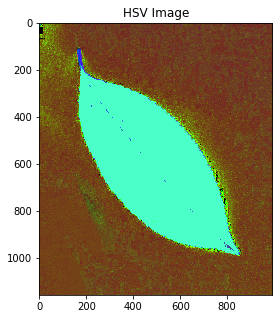

In [6]:
green_low = np.array([45 , 100, 50] )
green_high = np.array([75, 255, 255])
curr_mask = cv2.inRange(hsv_img, green_low, green_high)
hsv_img[curr_mask > 0] = ([75,255,200])
viewImage('HSV Image', hsv_img)

### Converting the HSV image to gray inorder to be able to apply contouring

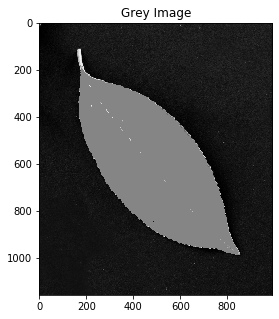

In [7]:
RGB_again = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
gray = cv2.cvtColor(RGB_again, cv2.COLOR_RGB2GRAY)
viewImage('Grey Image', gray, 'gray')

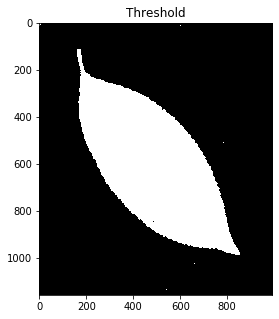

In [8]:
ret, threshold = cv2.threshold(gray, 90, 255, 0)
viewImage('Threshold', threshold, 'gray')

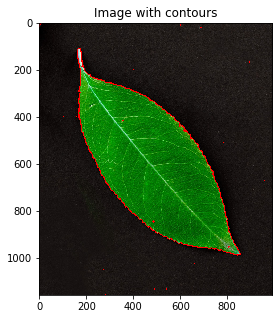

In [9]:
contours, hierarchy =  cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, contours, -1, (255, 0, 0), 3)
viewImage('Image with contours', image)

## Function to get the largest contour

In [10]:
def findGreatesContour(contours):
    
    # Initialize largest area
    largest_area = 0
   
    # Initialize largest contour index
    largest_contour_index = -1
    
    # Get largest contour
    i = 0
    total_contours = len(contours)
    # For every contour
    while (i < total_contours ):
        
        # Get area
        area = cv2.contourArea(contours[i])
        
        # If area greater than largest then set contour as largest
        if(area > largest_area):
            largest_area = area
            largest_contour_index = i
            
        i+=1
    
    # Return largest area, largest contour index
    return largest_area, largest_contour_index

Since there seem to be irregularities in the background as well. We can get the largest contour. The largest contour is the leaf.

In [11]:
largest_area, largest_contour_index = findGreatesContour(contours)

print('Largest Area: ', largest_area)
print('Largest Contour Index: ', largest_contour_index)
print('Total Contours: ', len(contours))

Largest Area:  278456.5
Largest Contour Index:  14
Total Contours:  37
